# Analyse des ventes 
***
## Analyse de l'évolution mensuelle des profits totaux 
***

In [ ]:
import pandas as pd 
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sb 
import numpy as np 
from scipy import stats 
# importer les données 
data = pd.read_csv('company_sales_data.csv')
# sélectionner les données que l'on veut mettre en graphique 
data["month"] = ["janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre"]
x = data["month"]
y = data["total_profit"]
# on crée la base du graphique 
sb.lineplot(x = x, y = y, color = "green")
# étiquettes d'axe
plt.xlabel("Mois")
plt.ylabel("Profits totaux")
# paramètres des graduations d'axes 
plt.xticks(rotation = 45)
# titre du graphique 
plt.title("Évolution mensuelle des profits totaux")
# customiser le style 
sb.set_theme(palette = "bright")
sb.set_style("darkgrid")
plt.show()

## Évolution des ventes unitaires mensuelles par produit 
***

In [ ]:
# on va définir les données que l'on doit visualiser 
x = data["month"]
y1 = data["facecream"]
y2 = data["facewash"]
y3 = data["toothpaste"]
y4 = data["bathingsoap"]
y6 = data["moisturizer"]
y5 = data["shampoo"]
# créer les courbes du graphique 
sb.lineplot(x = x, y = y1, color = "red", label = "Crème")
sb.lineplot(x = x, y = y2, color = "blue", label = "Nettoyant visage")
sb.lineplot(x = x, y = y3, color = "green", label = "Dentifrice")
sb.lineplot(x = x, y = y4, color = "cyan", label = "Gel douche")
sb.lineplot(x = x, y = y5, color = "black", label = "Shampooing")
sb.lineplot(x = x, y = y6, color = "pink", linestyle = "dashed", label = "Hydratant")
# créer une légende et un titre
plt.title("Évolution mensuelle des ventes par produit")
plt.legend()
# titres des axes 
plt.xlabel("Mois")
plt.ylabel("Ventes")
# paramètres des graduations d'axes 
plt.xticks(rotation = 45)


## Évolution du profit généré par produit 
***

In [ ]:
# idem que précédemment on change juste l'unité 
# pour cela on doit d'abord évaluer combien de pourcentage du profit chaque produit représente chaque mois
# et ensuite on applique ce pourcentage au nombre total d'unités mensuelles 
data.iloc[:,1:-2] = data.iloc[:,1:-2].apply(pd.to_numeric, errors='coerce')
product_fraction = data.iloc[:,1:-3].div(data.iloc[:,1:-3].sum(axis=1), axis=0)
product_profit = product_fraction.multiply(data["total_profit"], axis = "index")
display(product_profit)
# le graphique 
plt.plot(range(1,13),  product_profit["facecream"], label='Crème')
plt.plot(range(1,13),  product_profit["facewash"], label='Nettoyant visage')
plt.plot(range(1,13),  product_profit["toothpaste"], label='Dentifrice')
plt.plot(range(1,13), product_profit["bathingsoap"], label='Gel douche')
plt.plot(range(1,13), product_profit["shampoo"], label='Shampooing')
plt.plot(range(1,13), product_profit["moisturizer"], label='Hydratant')
# les labels 
xlabels = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]
legend_labels = ['Crème','Nettoyant visage','Dentifrice',"Gel douche","Shampooing", "Hydratant"]
plt.xticks(range(1,13), xlabels, rotation = 45)
plt.ylabel("Profit généré par les ventes")
plt.title("Évolution mensuelle des profits générés par les ventes de produits")
plt.legend(legend_labels)
plt.show()


## Évolution des parts de ventes mensuelles par produit 
***

In [ ]:
# cette fois c'est une percent stacked area chart 
# on garde les mêmes données qu'au dessus, mais cette fois on doit convertir en pourcentage 
# donc on rassemble dans un nouveau dataframe qu'on va normaliser 
# product_sales = pd.DataFrame({'facecream': y1, 'facewash': y2, 'toothpaste': y3, 'bathingsoap': y4, 'shampoo': y5, 'moisturizer': y6})
data.iloc[:,1:-2] = data.iloc[:,1:-2].apply(pd.to_numeric, errors='coerce')
product_percent = data.iloc[:,1:-3].div(data.iloc[:,1:-3].sum(axis=1), axis=0).multiply(100)
display(product_percent)
# maintenant on crée le graphique 
fig, ax = plt.subplots()
ax.stackplot(range(1,13),  product_percent["facecream"],  product_percent["facewash"],  product_percent["toothpaste"], product_percent["bathingsoap"], product_percent["shampoo"], product_percent["moisturizer"], labels=['Crème','Nettoyant visage','Dentifrice',"Gel douche","Shampooing", "Hydratant"])
ax.legend(bbox_to_anchor = (1, - 0.2), ncol = 3)
ax.margins(0,0)
xlabels = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]
ax.set_xticks(ticks = np.arange(1, 13, step = 1))
ax.set_xticklabels(labels = xlabels, rotation = 45)
ax.set_title('Évolution des parts de ventes mensuelles par produit')
sb.axes_style("ticks")
# Affichage des pourcentages pour chaque point de donnée
plt.show()


## Répartition des profits annuels par produit $
***

In [ ]:
# ici on va faire une pie-chart avec juste un partage des produits
# on reprend nos données et on additionne tout
display(data)
product_yearly_units = data.iloc[:,1:-3].apply(pd.to_numeric, errors='coerce').sum()
yearly_units = data.loc[:,"total_units"].sum()
product_yearly_percent = product_yearly_units.div(yearly_units)*100
print(product_yearly_percent)
product_yearly_percent.plot.pie(autopct='%.2f',)
plt.legend(loc = "lower left", bbox_to_anchor = (0, - 0.2), ncol = 3)
plt.title("Répartition annuelle des ventes par produit")
plt.show()

## Analyse de la répartition des produits par catégorie 
***

In [ ]:
# on va importer les dataframes des csv bookstore 
# importer les bases de données 
customers_df = pd.read_csv("./dataset_bookstore/customers.csv", sep = ",")
transactions_df = pd.read_csv("./dataset_bookstore/transactions.csv", sep = ",")
products_df = pd.read_csv("./dataset_bookstore/products.csv", sep = ",")
# les nettoyer 
customers_df = customers_df[~customers_df["client_id"].str.contains("ct")]
transactions_df = transactions_df[~transactions_df["client_id"].str.contains("ct")]
transactions_df = transactions_df[~transactions_df["id_prod"].str.contains("T")]
products_df = products_df[~products_df["id_prod"].str.contains("T")]
# faire un subset
products_by_type = products_df[["id_prod", "categ"]].groupby("categ").size()
print(products_by_type)
products_by_type.plot.pie(autopct='%.1f',)
plt.legend(loc = "lower left", bbox_to_anchor = (0, - 0.2), ncol = 3)
plt.title("Répartition des produits par type")
plt.show()

## Évolution du CA mensuel par catégorie de produit
***

In [ ]:
from datetime import datetime
# on fusionne les deux gros dataframes pour pas s'emmerder
product_sales_df = pd.merge(transactions_df, products_df, on='id_prod', how='inner')
# on reformate la date
product_sales_df["date"] = pd.to_datetime(product_sales_df['date'], format='%Y-%m-%d %H:%M:%S.%f').dt.strftime("%Y-%m")
# on calcule le CA 
prod_number = product_sales_df.groupby(["categ"]).size().reset_index(name = "categ_number")
product_sales_df = product_sales_df.merge(prod_number, on="categ", how="inner")
product_sales_df["turnover"] = np.multiply(product_sales_df["categ_number"], product_sales_df["price"])
# il faut trier par date et categorie
date_turnover = product_sales_df.groupby(["categ", "date"])["price"].sum().reset_index(name = "date_purchase")
display(date_turnover)
# on fait le graphique 
x = date_turnover["date"]
y1 = date_turnover.loc[date_turnover["categ"] == 0]["date_purchase"]
y2 = date_turnover.loc[date_turnover["categ"] == 1]["date_purchase"]
y3 = date_turnover.loc[date_turnover["categ"] == 2]["date_purchase"]
sb.lineplot(x = x, y = y1, color = "red", label = "Catégorie 0")
sb.lineplot(x = x, y = y2, color = "blue", label = "Catégorie 1")
sb.lineplot(x = x, y = y3, color = "green", label = "Catégorie 2")
# créer une légende et un titre
plt.title("Évolution mensuelle des ventes par catégorie de produit", fontsize = "16")
plt.legend()
# titres des axes 
plt.xlabel("Mois")
plt.ylabel("Ventes")
# paramètres des graduations d'axes 
plt.xticks(rotation = 45)
plt.show()


## Boîtes à moustaches : répartition des prix de produits par catégorie 
***

In [ ]:
# il va falloir faire un groupby categ et price ? 
price_by_type = products_df.groupby(["categ", "price"]).size().reset_index(name = "price_freq")
display(price_by_type)
# graphique 
sb.boxplot(x = price_by_type["categ"], y = price_by_type["price"])
# titre et labels
plt.title('Répartition des prix par catégorie de produits', fontsize = "16")
plt.xlabel("Catégorie")
plt.ylabel('Répartition par prix')
plt.show()


## Répartition de chiffre d'affaires par mois en fonction du genre du client
***

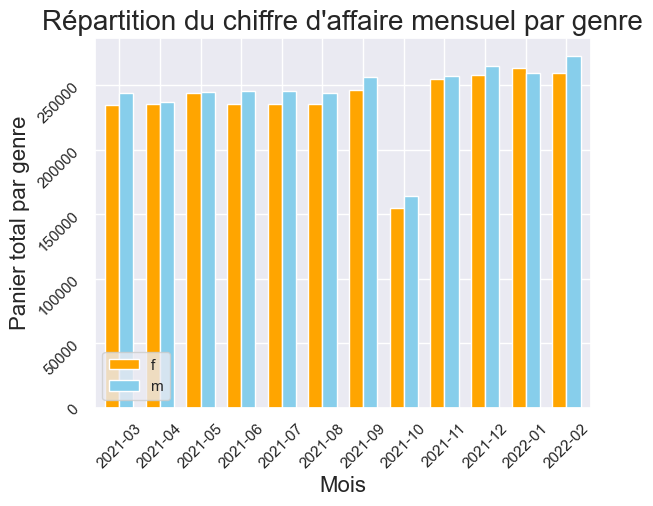

In [355]:
# on fusionne tout et on pop ce qui nous intéresse pas 
mega_df = pd.merge(transactions_df, products_df, on='id_prod', how='inner')
mega_df = pd.merge(mega_df, customers_df, on='client_id', how='inner')
mega_df = mega_df.drop(columns = ["birth", "categ", "session_id", "id_prod"])
# on met la date en forme 
mega_df["date"] = pd.to_datetime(mega_df['date'], format='%Y-%m-%d %H:%M:%S.%f').dt.strftime("%Y-%m")
# on va grouper par genre
gender_df = mega_df.groupby(["sex", "date"])["price"].sum().reset_index()
# faire pivoter le dataframe pour avoir les rangées en colonnes 
gender_df = gender_df.pivot(index="date", columns="sex", values="price")
# faire un double bar plot 
sb.set_palette("pastel")
gender_df.plot.bar(width = 0.7, color = ["orange", "skyblue"])
# changer les labels etc
plt.xlabel("Mois", fontsize = 16)
plt.ylabel("Panier total par genre", fontsize = 16)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.legend(loc = "lower left")
plt.title("Répartition du chiffre d'affaire mensuel par genre", fontsize = 20)
plt.show()




## 

## 